# Data Engineering Pipeline

Este notebook implementa um pipeline completo de engenharia de dados para análise e processamento do dataset fornecido.

## Estrutura do Pipeline:
1. **Setup e Instalação de Dependências**
2. **Carregamento e Análise Inicial dos Dados**  
3. **Análise Exploratória - Balanceamento de Classes**
4. **Pré-processamento dos Dados**
5. **Preparação para Modelagem**

## 1. Setup e Instalação de Dependências

Instalamos e importamos todas as bibliotecas necessárias para o pipeline de engenharia de dados:

In [12]:
%pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib

Note: you may need to restart the kernel to use updated packages.


## 2. Carregamento e Análise Inicial dos Dados

Carregamos o dataset e fazemos uma primeira análise das suas características:

In [13]:
print("--- Etapa 1: Carregando e Analisando o Dataset Fornecido ---")
try:
	import pandas as pd  # Ensure pandas is imported
	df = pd.read_csv('dataset-IA.csv', sep=';')
	print("Dataset 'dataset-IA.csv' carregado com sucesso.")
except FileNotFoundError:
	print("Erro: O arquivo 'dataset-IA.csv' não foi encontrado.")
	exit()

df.columns = ['A1', 'B1', 'C1', 'A2', 'B2', 'C2', 'A3', 'B3', 'C3', 'Classe']
print("\nInformações do Dataset:")
df.info()

--- Etapa 1: Carregando e Analisando o Dataset Fornecido ---
Dataset 'dataset-IA.csv' carregado com sucesso.

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      750 non-null    int64 
 1   B1      750 non-null    int64 
 2   C1      750 non-null    int64 
 3   A2      750 non-null    int64 
 4   B2      750 non-null    int64 
 5   C2      750 non-null    int64 
 6   A3      750 non-null    int64 
 7   B3      750 non-null    int64 
 8   C3      750 non-null    int64 
 9   Classe  750 non-null    object
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


## 3. Análise Exploratória - Balanceamento de Classes

Verificamos a distribuição das classes no dataset para identificar possíveis desbalanceamentos:


--- Etapa 2: Verificando o Balanceamento das Classes ---
Classe
Fim de Jogo             250
Possibilidade de Fim    250
Tem Jogo                250
Name: count, dtype: int64


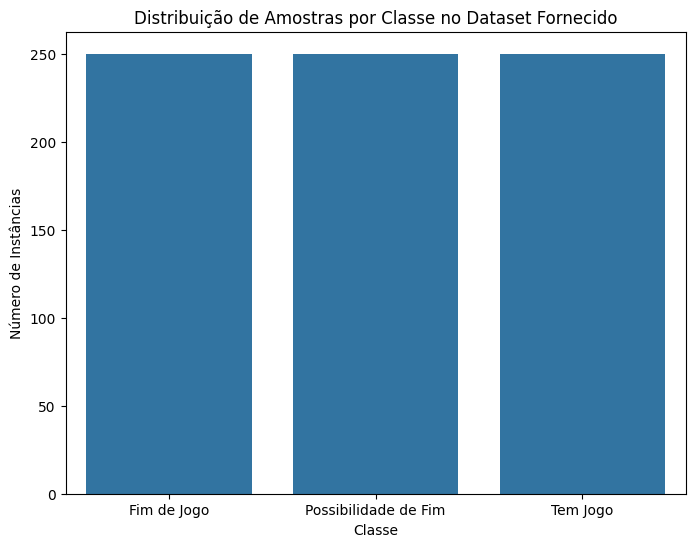

In [14]:
print("\n--- Etapa 2: Verificando o Balanceamento das Classes ---")
class_counts = df['Classe'].value_counts()
print(class_counts)

# Make sure necessary libraries are imported
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Classe', data=df, order=class_counts.index)
plt.title('Distribuição de Amostras por Classe no Dataset Fornecido')
plt.ylabel('Número de Instâncias')
plt.xlabel('Classe')
plt.savefig('distribuicao_classes_carregado.png')
plt.show()

## 4. Pré-processamento e Divisão dos Dados

Realizamos a codificação das features categóricas e dividimos os dados em conjuntos de treino, validação e teste:

In [15]:
print("\n--- Etapa 3: Engenharia de Características e Divisão dos Dados ---")
X = df.drop('Classe', axis=1)
y = df['Classe']

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

df_processed = pd.DataFrame(X_onehot, columns=onehot_encoder.get_feature_names_out(X.columns))
df_processed['target'] = y_encoded

train_df, temp_df = train_test_split(df_processed, test_size=0.2, random_state=42, stratify=df_processed['target'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['target'])

train_df.to_csv('train_dataset.csv', index=False)
val_df.to_csv('validation_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)
joblib.dump(onehot_encoder, 'onehot_encoder.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

print("\nDatasets de treino, validação e teste foram salvos com sucesso!")


--- Etapa 3: Engenharia de Características e Divisão dos Dados ---

Datasets de treino, validação e teste foram salvos com sucesso!
